# Lab 3: ATLAS Data Analysis

Gillian La Vina

April 28, 2025

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.optimize import curve_fit

In [2]:
# Defining Constants

# Value                       # Units                   # Quantity Name 
# --------------------------- # ----------------------- # ----------------------
m_zBoson = 91.1880            # GeV/c^2                 # Mass of Z boson
u_m_zBoson = 0.0020           # GeV/c^2                 # Error of Mass Z boson

m_wBoson = 80.3692            # GeV/c^2                 # Mass W Boson
u_m_wBoson = 0.0133           # GeV/c^2                 # Error

m_higgs = 125.20              # GeV/c^2                 # Mass Higgs Boson
u_m_higgs = 0.11              # GeV/c^2 

m_electron = 0.51099895000    # MeV/c^2                 # Mass electron
u_m_electron = 0.00000000015  # MeV/c^2

m_muon = 105.6583755          # MeV/c^2                 # Mass Muon
u_m_mon = 0.0000023           # MeV/c^2

m_tau = 1776.93               # MeV/c^2                 # Mass Tau
u_m_tau = 0.09                # MeV/c^2 

## Part 1: The Invariant Mass Distribution

$$
p_x = p_Tcos(\phi), \,\,\,\,\, p_y = p_Tsin(\phi), \,\,\,\,\, p_z = p_Tsinh(\eta)
$$

$$
M = \sqrt{E^2 - ({p_x}^2 + {p_y}^2 + {p_z}^2) }
$$

$$
M_{tot} = \sqrt{(E_1 + E_2)^2 - (\sum\limits_{i = x,y,z} {p_{i1}}^2 + {p_{i2}}^2) }
$$

In [3]:
# Load the Data
atlas_data = np.genfromtxt("atlas_z_to_ll.csv", delimiter = ",", skip_header = 1)
atlas_dataframe = pd.read_csv("atlas_z_to_ll.csv")


# Create functions for the momentum in each direction
def px(pt, phi): 
    # pt: transverse momentum 
    px = pt * np.cos(phi)
    return px

def py(pt, phi):
    # pt: transverse momentum 
    py = pt * np.sin(phi)
    return py

def pz(pt, eta):
    # pt: transverse momentum 
    pz = pt * np.sinh(eta)
    return pz

# Function for mass
def Mass(E, px, py, pz):
    M = np.sqrt( E**2 - (px**2 + py**2 + pz**2) )
    return M

# Calculate the mass of a partcle which decayed to produce the pair
    # (given two leptons, pt1 and pt2, etc.)

# Get vector components in 3 dimensions of each lepton
px1_array = px(atlas_dataframe["pt1"], atlas_dataframe["phi1"])    # all px1 values, in GeV/c
py1_array = py(atlas_dataframe["pt1"], atlas_dataframe["phi1"])    # GeV/c
pz1_array = pz(atlas_dataframe["pt1"], atlas_dataframe["eta1"])    # GeV/c

px2_array = px(atlas_dataframe["pt2"], atlas_dataframe["phi2"])    # all px2 values, in GeV/c
py2_array = py(atlas_dataframe["pt2"], atlas_dataframe["phi2"])    # GeV/c
pz2_array = pz(atlas_dataframe["pt2"], atlas_dataframe["eta2"])    # GeV/c

# Total momenta in each component 
px_tot_array = px1_array + px2_array # GeV/c
py_tot_array = py1_array + py2_array # GeV/c
pz_tot_array = pz1_array + pz2_array # GeV/c

# Total Energy
E_tot_array = atlas_dataframe["E1"] + atlas_dataframe["E2"] # GeV

# Get summed mass, using energy and momenta 
Mass_array = Mass(E_tot_array, px_tot_array, py_tot_array, pz_tot_array) # GeV/c^2

print(Mass_array)

0       92.150037
1       89.282450
2       88.274725
3       46.788243
4       91.529042
          ...    
4995    61.176716
4996    23.468150
4997    89.496742
4998    67.409373
4999    90.847967
Length: 5000, dtype: float64


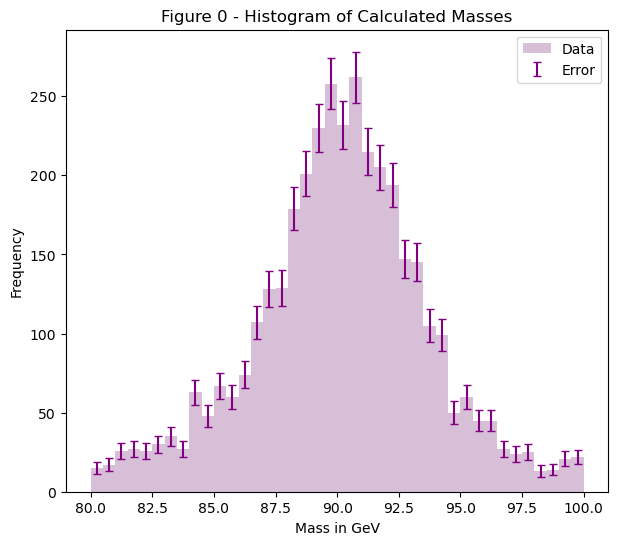

In [4]:
# Make a histogram with Error Bars

# Get bins
bins = np.linspace(80, 100, 41) # GeV/c^2, or just GeV since c = 1

# Make figure
fig, ax = plt.subplots(figsize = (7, 6))
counts, bins_edges, graph = ax.hist(Mass_array, bins = bins, color = "thistle", label = "Data");

# Get error
error_on_counts = np.sqrt(counts) # counts

# Get the centers of bins
bin_cents = (1/2) * (bins_edges[1:] + bins_edges[:-1]) # in GeV
ax.errorbar(bin_cents, counts, yerr = error_on_counts, linestyle = "", capsize = 3, color = "purple", label = "Error");

ax.set_title("Figure 0 - Histogram of Calculated Masses");
ax.set_xlabel("Mass in GeV");
ax.set_ylabel("Frequency");
ax.legend();

## Part 2: Breit Wigner Fit

$$
D(m; m_0, \Gamma) = \frac{1}{\pi} \frac{\Gamma/2} {(m-m_0)^2 + (\Gamma/2)^2}
$$

[90.34080586  6.39099839]
[87.25 87.75 88.25 88.75 89.25 89.75 90.25 90.75 91.25 91.75 92.25 92.75]


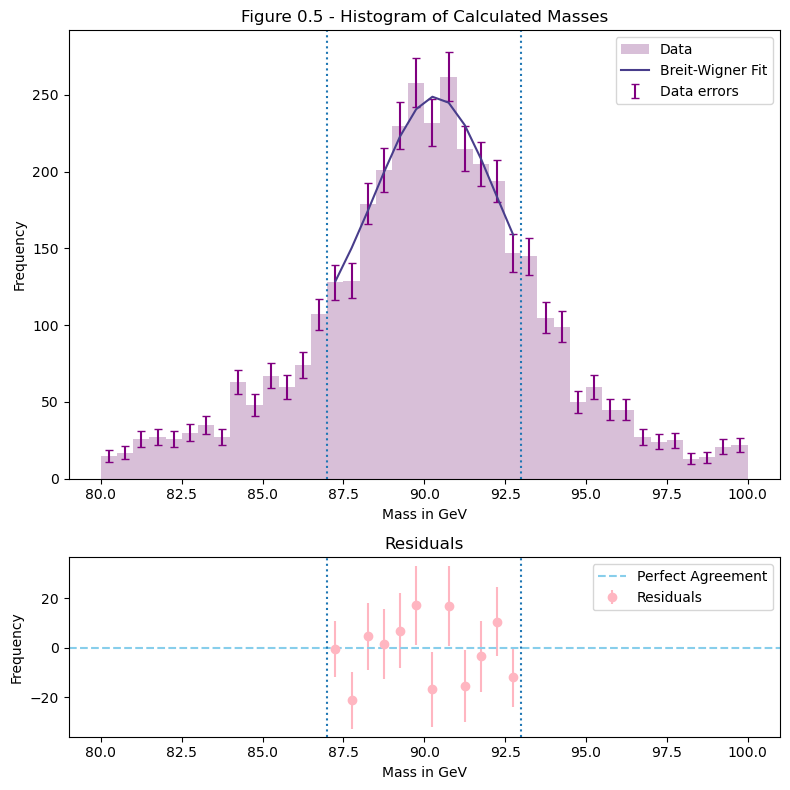

In [5]:
# Function for decay distribution

def decay(m, m0, Gamma):
    c0 = 1 / np.pi
    c1 = 5000/2
    num = Gamma / 2
    denom = (m - m0)**2 + (Gamma/2)**2
    return c0*c1 * (num/denom)

# Only fitting between 87 and 93 GeV, so create mask
mask = (bin_cents > 87) & (bin_cents < 93)


# Get the fit
params, covar = curve_fit(decay, bin_cents[mask], counts[mask], sigma = error_on_counts[mask], absolute_sigma=True)
print(params)
print(bin_cents[mask])

# Make Figure of the data
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (8, 8), gridspec_kw={'height_ratios':[2.5,1]}, 
                              #sharex=True
                             )

# Histogram
counts, bins_edges, graph = ax.hist(Mass_array, bins = bins, color = "thistle", label = "Data");
# Error bars
ax.errorbar(bin_cents, counts, yerr = error_on_counts, linestyle = "", capsize = 3, color = "purple", label = "Data errors");

# Plot the fit 
ax.plot(bin_cents[mask], decay(bin_cents[mask], params[0], params[1]), label = "Breit-Wigner Fit", color = "darkslateblue")

ax.set_title("Figure 0.5 - Histogram of Calculated Masses");
ax.legend();
ax.set_ylabel("Frequency");
ax.set_xlabel("Mass in GeV");

ax2.set_title("Residuals")
ax2.set_ylabel("Frequency");
ax2.set_xlabel("Mass in GeV");


# Plot the residuals, ydata-ytheory
residuals = counts[mask] - decay(bin_cents[mask], params[0], params[1])
ax2.errorbar(bin_cents[mask], residuals, yerr=error_on_counts[mask], fmt = "o", color = "lightpink", label = "Residuals")
ax2.set_xlim(79, 101)
ax2.axhline(0, color = "skyblue", ls="--", label = "Perfect Agreement")
ax2.legend();

# Put vertical lines
ax.axvline(87, linestyle = ":")
ax.axvline(93, linestyle = ":")
ax2.axvline(87, linestyle = ":")
ax2.axvline(93, linestyle = ":");

fig.tight_layout();

$$
 \chi^2 =         \sum_{i=1}^{N} \frac{(y_i - f(x_i))^2}{\sigma^2}
$$

$$
 \chi^2 =         \sum_{i=1}^{N} \frac{(y_{data} - y_{theory})}{\sigma^2}
$$

In [6]:
# Calculate Chi-square between 87 < x < 93

# Histogram
counts, bins_edges, graph = ax.hist(Mass_array, bins = bins, color = "thistle", label = "Data");
# Error bars
ax.errorbar(bin_cents, counts, yerr = error_on_counts, linestyle = "", capsize = 3, color = "purple", label = "Data errors");
# Plot the fit 
ax.plot(bin_cents[mask], decay(bin_cents[mask], params[0], params[1]), label = "Breit-Wigner Fit", color = "hotpink")

# Calculate the chi-square in the fitting range 
residuals = counts[mask] - decay(bin_cents[mask], params[0], params[1])
error_on_counts = np.sqrt(counts)
chisq = np.sum((residuals)**2/error_on_counts[mask]**2)
print('chi squared = ', chisq)

# Reduced chi squared = chisq/dof
fit_params = 2 # number of parameters to create fit
ndof = len(counts[mask]) - fit_params # dof = data points - fit params 
red_chisq = chisq/ndof
print(f"Degrees of freedom: {ndof}")
print(f"Reduced chi squared = {red_chisq:.3g}")

# P-value 
pvalue = st.chi2.sf(chisq, ndof) 
print(f"P value = {pvalue:.2g}")

chi squared =  9.985097164263715
Degrees of freedom: 10
Reduced chi squared = 0.999
P value = 0.44


In [7]:
def decay(m, m0, Gamma):
    c0 = 1 / np.pi
    c1 = 5000/2
    num = Gamma / 2
    denom = (m - m0)**2 + (Gamma/2)**2
    return c0*c1 * (num/denom)

#print(covar)

# uncert = sqrt of first element, 
# print(np.sqrt(covar[0][0]))

u_m0, u_Gamma = np.sqrt(np.diag(covar)) # Gets error of m0 and Gamma
#print(u_m0, u_Gamma)
print(f"Best fit of m0 is {params[0]:.2f} +- {u_m0:.2f}")
print(f"(The uncertainty of m0 is {u_m0:.2f})")
print(f"Best fit of Gamma is {params[1]:.2f} +- {u_Gamma:.2f}")

# Qualitatively, m0 is center, gamma is height/width

Best fit of m0 is 90.34 +- 0.09
(The uncertainty of m0 is 0.09)
Best fit of Gamma is 6.39 +- 0.18


Best fit of m0 is 90.34 +- 0.09
Best fit of Gamma is 6.39 +- 0.18
chi squared =  9.985097164263715
Reduced chi squared = 0.999
P value = 0.44


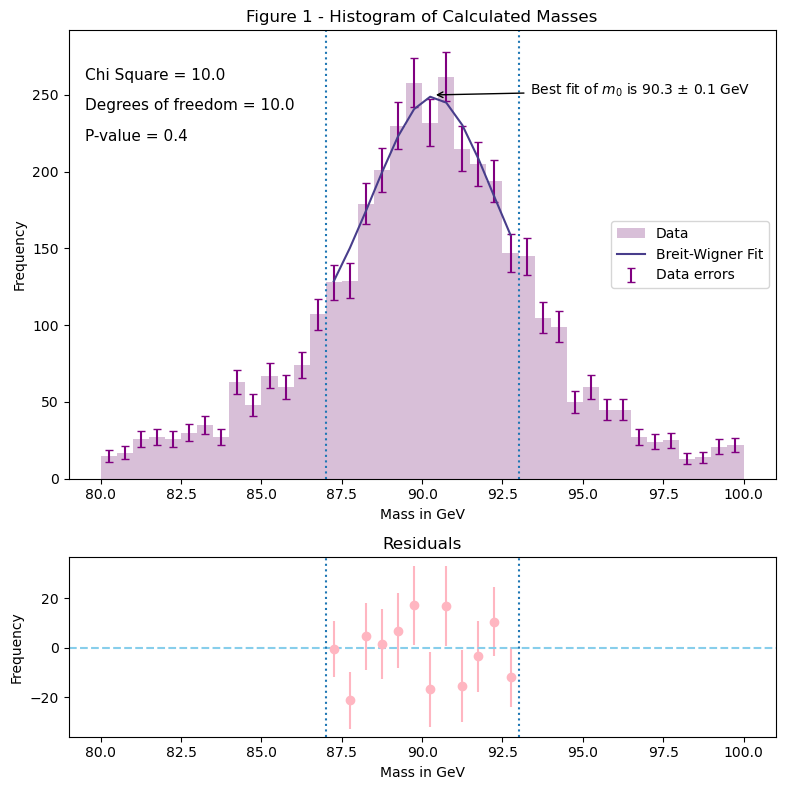

In [8]:
# Annotate the Plot

# Make Figure of the data
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (8, 8), gridspec_kw={'height_ratios':[2.5,1]}, 
                              #sharex=True
                             )

# Histogram
counts, bins_edges, graph = ax.hist(Mass_array, bins = bins, color = "thistle", label = "Data");
# Error bars
ax.errorbar(bin_cents, counts, yerr = error_on_counts, linestyle = "", capsize = 3, color = "purple", label = "Data errors");

# Plot the fit 
ax.plot(bin_cents[mask], decay(bin_cents[mask], params[0], params[1]), label = "Breit-Wigner Fit", color = "darkslateblue")

ax.set_title("Figure 1 - Histogram of Calculated Masses");
ax.legend(loc = "center right");

ax2.set_title("Residuals")

# Plot the residuals, ydata-ytheory
residuals = counts[mask] - decay(bin_cents[mask], params[0], params[1])
ax2.errorbar(bin_cents[mask], residuals, yerr=error_on_counts[mask], fmt = "o", color = "lightpink")
ax2.set_xlim(79, 101)
ax2.axhline(0, color = "skyblue", ls="--")

# Put vertical lines
ax.axvline(87, linestyle = ":")
ax.axvline(93, linestyle = ":")
ax2.axvline(87, linestyle = ":")
ax2.axvline(93, linestyle = ":");

print(f"Best fit of m0 is {params[0]:.2f} +- {u_m0:.2f}")
print(f"Best fit of Gamma is {params[1]:.2f} +- {u_Gamma:.2f}")

m0_fit = params[0]
Gamma_fit = params[1]

chisq = np.sum((residuals)**2/error_on_counts[mask]**2)
print('chi squared = ', chisq)

red_chisq = chisq/ndof
print(f"Reduced chi squared = {red_chisq:.3g}")

pvalue = st.chi2.sf(chisq, ndof) 
print(f"P value = {pvalue:.2g}")

# Annotate: best fit mass, uncertainty, chi2/ndof, pval

# Text to add
txt = f"Reduced Chi Squared = {red_chisq:.1f}"
txt2 = f"P-value = {pvalue:.1f}"
txt3 = f"Best fit of $m_0$ is {m0_fit:.1f} $\\pm$ {u_m0:.1f} GeV"
txt4 = f"Chi Square = {chisq:.1f}"
txt5 = f"Degrees of freedom = {ndof:.1f}"

ax.annotate(txt4, (79.5, 260), fontsize = 11)
ax.annotate(txt5, (79.5, 240), fontsize = 11)
ax.annotate(txt2, (79.5, 220), fontsize = 11);


ax.annotate(txt3, xy=(m0_fit, 250), xytext=(m0_fit+3, 250),
            fontsize=10,
            arrowprops=dict(arrowstyle = "->", facecolor='black')
           );


ax.set_ylabel("Frequency");
ax.set_xlabel("Mass in GeV");
ax2.set_ylabel("Frequency");
ax2.set_xlabel("Mass in GeV");

fig.tight_layout();

## Part 3: 2D Parameter Contours

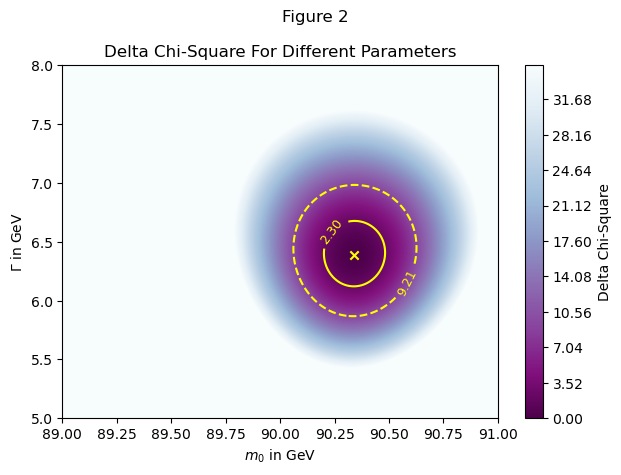

In [9]:
# 2D chi2 scan

# Equation for theory 
def decay(m, m0, Gamma):
    c0 = 1 / np.pi
    c1 = 5000/2
    num = Gamma / 2
    denom = (m - m0)**2 + (Gamma/2)**2
    return c0*c1 * (num/denom)

# Double for loop that hunts for both m0 and gamma

# Initialize chi_map
n_bins = 300
chi_map = np.zeros((n_bins, n_bins))

# Limits on m0, Gamma
m0_array = np.linspace(89, 91, n_bins) # Search masses 
Gamma_array = np.linspace(5, 8, n_bins)


# Theory calculation
    # decay(xdata, m0_array[i], Gamma_array[j]
    # Data 
residuals = counts[mask] - decay(bin_cents[mask], params[0], params[1]) # params[0] is m0, params[1] is Gamma, in GeV


# Calculate chi2 for all combinations of m0, Gamma using double for loop
for i in range(n_bins):
    for j in range(n_bins):
        theory = decay(bin_cents[mask], m0_array[i], Gamma_array[j])
        data = counts[mask]
        residuals = data - theory 
        chi2 = np.sum((residuals)**2/error_on_counts[mask]**2)
        chi_map[j,i] = chi2

# clip z-axis range
chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min+35) # clips of anything above chi_min+35, and sets it to 35
delta_chi_map = chi_map - chi_min
    # In this map, the minimum value should be zero; measures distance from min value, so min dist = 0 

# Create meshgrid, plot values 
X, Y = np.meshgrid(m0_array, Gamma_array)
fig2, ax2 = plt.subplots()
cs = ax2.contourf(X, Y, delta_chi_map, 500, cmap = "BuPu_r")
cbar = fig2.colorbar(cs, ax=ax2)
cbar.set_label("Delta Chi-Square")


# Find 1 sigma and 3 sigma 
levels = [2.3, 9.21]
CS = ax2.contour(X, Y, delta_chi_map, levels = levels, colors = ["yellow", "yellow"],
                linestyles = ["solid", "dashed"],
                ) # drawn in 1 and 2 sigma containment regions
ax2.clabel(CS, inline = True, fontsize = 9)

# Add a dot for best fit
m0_fit = params[0]
Gamma_fit = params[1]
ax2.scatter(m0_fit, Gamma_fit, marker = "x", color = "yellow");

fig2.suptitle("Figure 2");

ax2.set_title("Delta Chi-Square For Different Parameters")
ax2.set_xlabel("$m_0$ in GeV")
ax2.set_ylabel("${\\Gamma}$ in GeV")

fig2.tight_layout();

In [10]:
# Comparing to Literature Value

m_zBoson = 91.1880            # GeV/c^2                 # Mass of Z boson
u_m_zBoson = 0.0020           # GeV/c^2                 # Error of Mass Z boson

# Delta over sigma delta

print(f"Best fit of m0 is {params[0]:.2f} +- {u_m0:.2f}")

delta = -(m0_fit - m_zBoson) # GeV
sigma_delta = np.sqrt(u_m0**2+u_m_zBoson**2)

compatibility = delta/sigma_delta

print(compatibility)

Best fit of m0 is 90.34 +- 0.09
9.057392059263222
